In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [3]:
data=pd.read_csv('bodyPerformance.csv')

In [4]:
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [5]:
# create dummy variables
dummies=pd.get_dummies(data.gender)
dummies

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
13388,0,1
13389,0,1
13390,0,1
13391,1,0


In [6]:
data=pd.concat([data,dummies],axis=1)
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,F,M
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,1
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,1
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,1
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,1
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0,1
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0,1
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,1
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,1,0


In [7]:
data=data.drop('gender',axis=1)
data

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,F,M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,1,0


In [8]:
x=data.drop('class',axis=1)
y=data['class']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

In [11]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Amjad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred=model.predict(x_test)

In [13]:
prediction_table=pd.DataFrame({'True y':y_test,'Predicted_y':y_pred})
prediction_table

,True y,Predicted_y
12811,B,C
218,C,D
1771,A,A
9896,A,B
8164,B,B
...,...,...
2359,D,D
2231,A,B
11164,A,A
1752,C,D


In [14]:
model.score(x_train,y_train)

0.6013540422142573

In [15]:
model.score(x_test,y_test)

0.6127202149895491

In [16]:
accuracy_score(y_test,y_pred)

0.6127202149895491

In [17]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[611 216  25   1]
 [228 368 217  32]
 [ 73 159 421 147]
 [ 13  42 144 652]]


Text(50.722222222222214, 0.5, 'True Values')

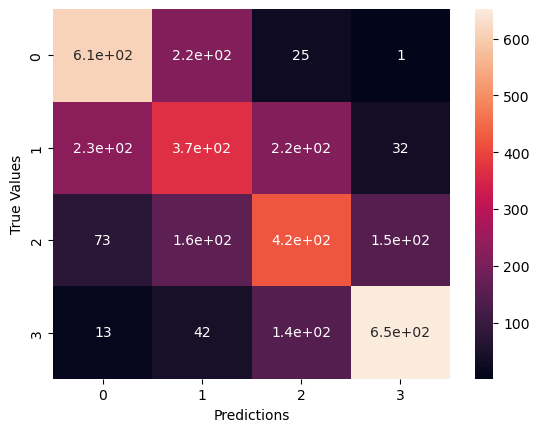

In [20]:
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.xlabel('Predictions')
plt.ylabel('True Values')